In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd
import numpy as np
import os
import glob
from google.colab import drive

# Downloading and preprocessing the data

In [ ]:
drive.mount('/content/drive')

# Folder with all CSV-files
folder_path = "/content/drive/MyDrive/Total_net"

# Find all CSV files
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

# Read and unite CSV files
df_list = [pd.read_csv(file) for file in csv_files]
combined_df = pd.concat(df_list, ignore_index=True)

# Save into 1 CSV-file
combined_df.to_csv('connected_file.csv', index=False)

# download file
df1 = pd.read_csv('connected_file.csv')

df1 = df1.iloc[1:]

# Working with first column (divide it into 2 columns with Date and Time)
df1['Date (GMT+1)'] = pd.to_datetime(df1['Date (GMT+1)'], utc=True)

df1['Date'] = df1['Date (GMT+1)'].dt.date       # Only date
df1['Time'] = df1['Date (GMT+1)'].dt.time       # Only Time

df1.drop(columns=['Date (GMT+1)'], inplace=True)
df1.drop(columns=['Solar'], inplace=True)



# Save
df1.to_csv('with_separated_time_and_date.csv', index=False)


print(len(df1))
df1.head()

MessageError: Error: credential propagation was unsuccessful

In [ ]:
# Folder with all CSV-files
folder_path2 = "/content/drive/MyDrive/Forecast"

# Find all CSV files
csv_files2 = glob.glob(os.path.join(folder_path2, '*.csv'))

# Read and unite CSV files
df_list2 = [pd.read_csv(file) for file in csv_files2]
combined_df2 = pd.concat(df_list2, ignore_index=True)

# Save into 1 CSV-file
combined_df2.to_csv('connected_file2.csv', index=False)

# download file
df2 = pd.read_csv('connected_file2.csv')

df2 = df2.iloc[1:187300]

# Working with first column (we don't need it here)
df2.drop(columns=['Date (GMT+1)'], inplace=True)

# Save
df2.to_csv('with_separated_time_and_date2.csv', index=False)


print(len(df2))
df2.head()

187299


Solar Solar forecast (Day-Ahead, D-1 18:00) Solar forecast (Intraday, 8:00)  \
1   3.5                                     0                               0   
2   3.6                                     0                               0   
3   2.8                                     0                               0   
4   2.7                                     0                               0   
5   3.4                                     0                               0   

  Solar forecast (Current)  
1                        0  
2                        0  
3                        0  
4                        0  
5                        0

In [ ]:
final_df = pd.concat([df1, df2], axis=1)
final_df.to_csv('connected_by_columns.csv', index=False)
final_df.head()

# Delete two columns where we don't have enough information
final_df.drop(columns=['Solar forecast (Current)', 'Fossil coal-derived gas', 'Solar forecast (Intraday, 8:00)'], inplace=True)
final_df.head()
final_df = final_df[~final_df.isin(['Power (MW)']).any(axis=1)]

# Germany doesn't have Nuclear energy
final_df.drop(columns=['Nuclear'], inplace=True)

<ipython-input-4-9540f92f656e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.drop(columns=['Nuclear'], inplace=True)


In [ ]:
# We don't need offshore and onshore, just summ it
final_df['Wind offshore'] = pd.to_numeric(final_df['Wind offshore'], errors='coerce')
final_df['Wind onshore'] = pd.to_numeric(final_df['Wind onshore'], errors='coerce')

final_df['Wind'] = final_df['Wind offshore'] + final_df['Wind onshore']
final_df.drop(columns=['Wind offshore','Wind onshore'], inplace=True)
final_df.head()

<ipython-input-5-f989f581f526>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Wind offshore'] = pd.to_numeric(final_df['Wind offshore'], errors='coerce')


Hydro Run-of-River Biomass Fossil brown coal / lignite Fossil hard coal  \
1             1526.9  4501.3                      3336.8           2691.3   
2             1540.1  4355.5                      3350.9           2447.3   
3             1539.7  4288.4                      3347.5           2423.2   
4             1567.1  4257.1                      3379.6           2411.4   
5             1542.2  4329.6                      3930.2           2404.7   

  Fossil oil Fossil gas Geothermal Hydro water reservoir Hydro pumped storage  \
1      513.3     5017.1       23.8                 108.6                453.1   
2      513.4     5000.2       23.8                 160.7                838.4   
3      513.3     4952.9       23.8                  75.1                435.4   
4      513.3     5019.7       23.9                    58                105.9   
5      513.3     4799.9         24                  58.5                  367   

   Others  Waste Load (incl. self-consumption)        Date      Time Solar  \
1  1479.8  961.3                       50971.8  2024-12-31  23:00:00   3.5   
2  1480.2    961                         50048  2024-12-31  23:15:00   3.6   
3  1480.3  961.1                       50088.8  2024-12-31  23:30:00   2.8   
4    1480  962.5                       49955.6  2024-12-31  23:45:00   2.7   
5  1479.5  966.4                       49695.9  2025-01-01  00:00:00   3.4   

  Solar forecast (Day-Ahead, D-1 18:00)     Wind  
1                                     0  34877.6  
2                                     0  34924.2  
3                                     0  34863.7  
4                                     0  34833.3  
5                                     0  34992.6

In [ ]:
#check for NaN values

print(final_df.isna().mean() * 100)
df_clean = final_df.dropna(subset=['Load (incl. self-consumption)'])

Hydro Run-of-River                       0.000000
Biomass                                  0.000000
Fossil brown coal / lignite              0.000000
Fossil hard coal                         0.000000
Fossil oil                               0.000000
Fossil gas                               0.000000
Geothermal                               0.000000
Hydro water reservoir                    0.000000
Hydro pumped storage                     0.000000
Others                                   0.000000
Waste                                    0.000000
Load (incl. self-consumption)            0.000534
Date                                     0.000000
Time                                     0.000000
Solar                                    0.049656
Solar forecast (Day-Ahead, D-1 18:00)    0.000000
Wind                                     0.000000
dtype: float64


In [ ]:
#dropping Nan values
df_clean = df_clean.dropna()
print(df_clean.isna().mean() * 100)

Hydro Run-of-River                       0.0
Biomass                                  0.0
Fossil brown coal / lignite              0.0
Fossil hard coal                         0.0
Fossil oil                               0.0
Fossil gas                               0.0
Geothermal                               0.0
Hydro water reservoir                    0.0
Hydro pumped storage                     0.0
Others                                   0.0
Waste                                    0.0
Load (incl. self-consumption)            0.0
Date                                     0.0
Time                                     0.0
Solar                                    0.0
Solar forecast (Day-Ahead, D-1 18:00)    0.0
Wind                                     0.0
dtype: float64


In [ ]:

# make a copy
dfd = df_clean.copy()

# === ШАГ 1. Making new index (DateTime format) and converting 'Load' column into numerical type ===
dfd['Datetime'] = pd.to_datetime(dfd['Date'].astype(str) + ' ' + dfd['Time'].astype(str))
dfd.set_index('Datetime', inplace=True)
dfd.sort_index(inplace=True)
dfd['Load (incl. self-consumption)'] = pd.to_numeric(dfd['Load (incl. self-consumption)'], errors='coerce')
dfd = dfd.drop(columns=['Date', 'Time'])  # delete old rows
for col in dfd.columns:
    dfd[col] = pd.to_numeric(dfd[col], errors='coerce')
dfd.head()

Hydro Run-of-River  Biomass  Fossil brown coal / lignite  \
Datetime                                                                        
2019-12-31 23:00:00              1591.9   5396.8                       9410.0   
2019-12-31 23:15:00              1586.9   5390.0                       9434.5   
2019-12-31 23:30:00              1581.2   5372.1                       9467.0   
2019-12-31 23:45:00              1581.3   5372.3                       9479.7   
2020-01-01 00:00:00              1581.8   5369.3                       9540.4   

                     Fossil hard coal  Fossil oil  Fossil gas  Geothermal  \
Datetime                                                                    
2019-12-31 23:00:00            2200.5       503.8      9408.1        27.9   
2019-12-31 23:15:00            2159.4       503.9      9209.9        27.9   
2019-12-31 23:30:00            2153.1       503.9      9069.3        27.9   
2019-12-31 23:45:00            2186.7       503.9      8956.1        27.8   
2020-01-01 00:00:00            2145.8       503.9      8659.5        27.9   

                     Hydro water reservoir  Hydro pumped storage  Others  \
Datetime                                                                   
2019-12-31 23:00:00                  451.2                1026.3  1630.5   
2019-12-31 23:15:00                  385.7                 628.8  1609.6   
2019-12-31 23:30:00                  274.5                 528.6  1609.2   
2019-12-31 23:45:00                   98.7                 312.0  1609.5   
2020-01-01 00:00:00                  244.1                 723.0  1609.3   

                      Waste  Load (incl. self-consumption)  Solar  \
Datetime                                                            
2019-12-31 23:00:00  1399.9                        47213.4    4.2   
2019-12-31 23:15:00  1409.5                        46952.8    4.0   
2019-12-31 23:30:00  1416.4                        46620.7    3.8   
2019-12-31 23:45:00  1408.1                        46425.5    3.9   
2020-01-01 00:00:00  1385.0                        46283.2    3.9   

                     Solar forecast (Day-Ahead, D-1 18:00)    Wind  
Datetime                                                            
2019-12-31 23:00:00                                    0.0  6410.4  
2019-12-31 23:15:00                                    0.0  6407.3  
2019-12-31 23:30:00                                    0.0  6649.0  
2019-12-31 23:45:00                                    0.0  6896.0  
2020-01-01 00:00:00                                    0.0  6985.2

# Main graphs

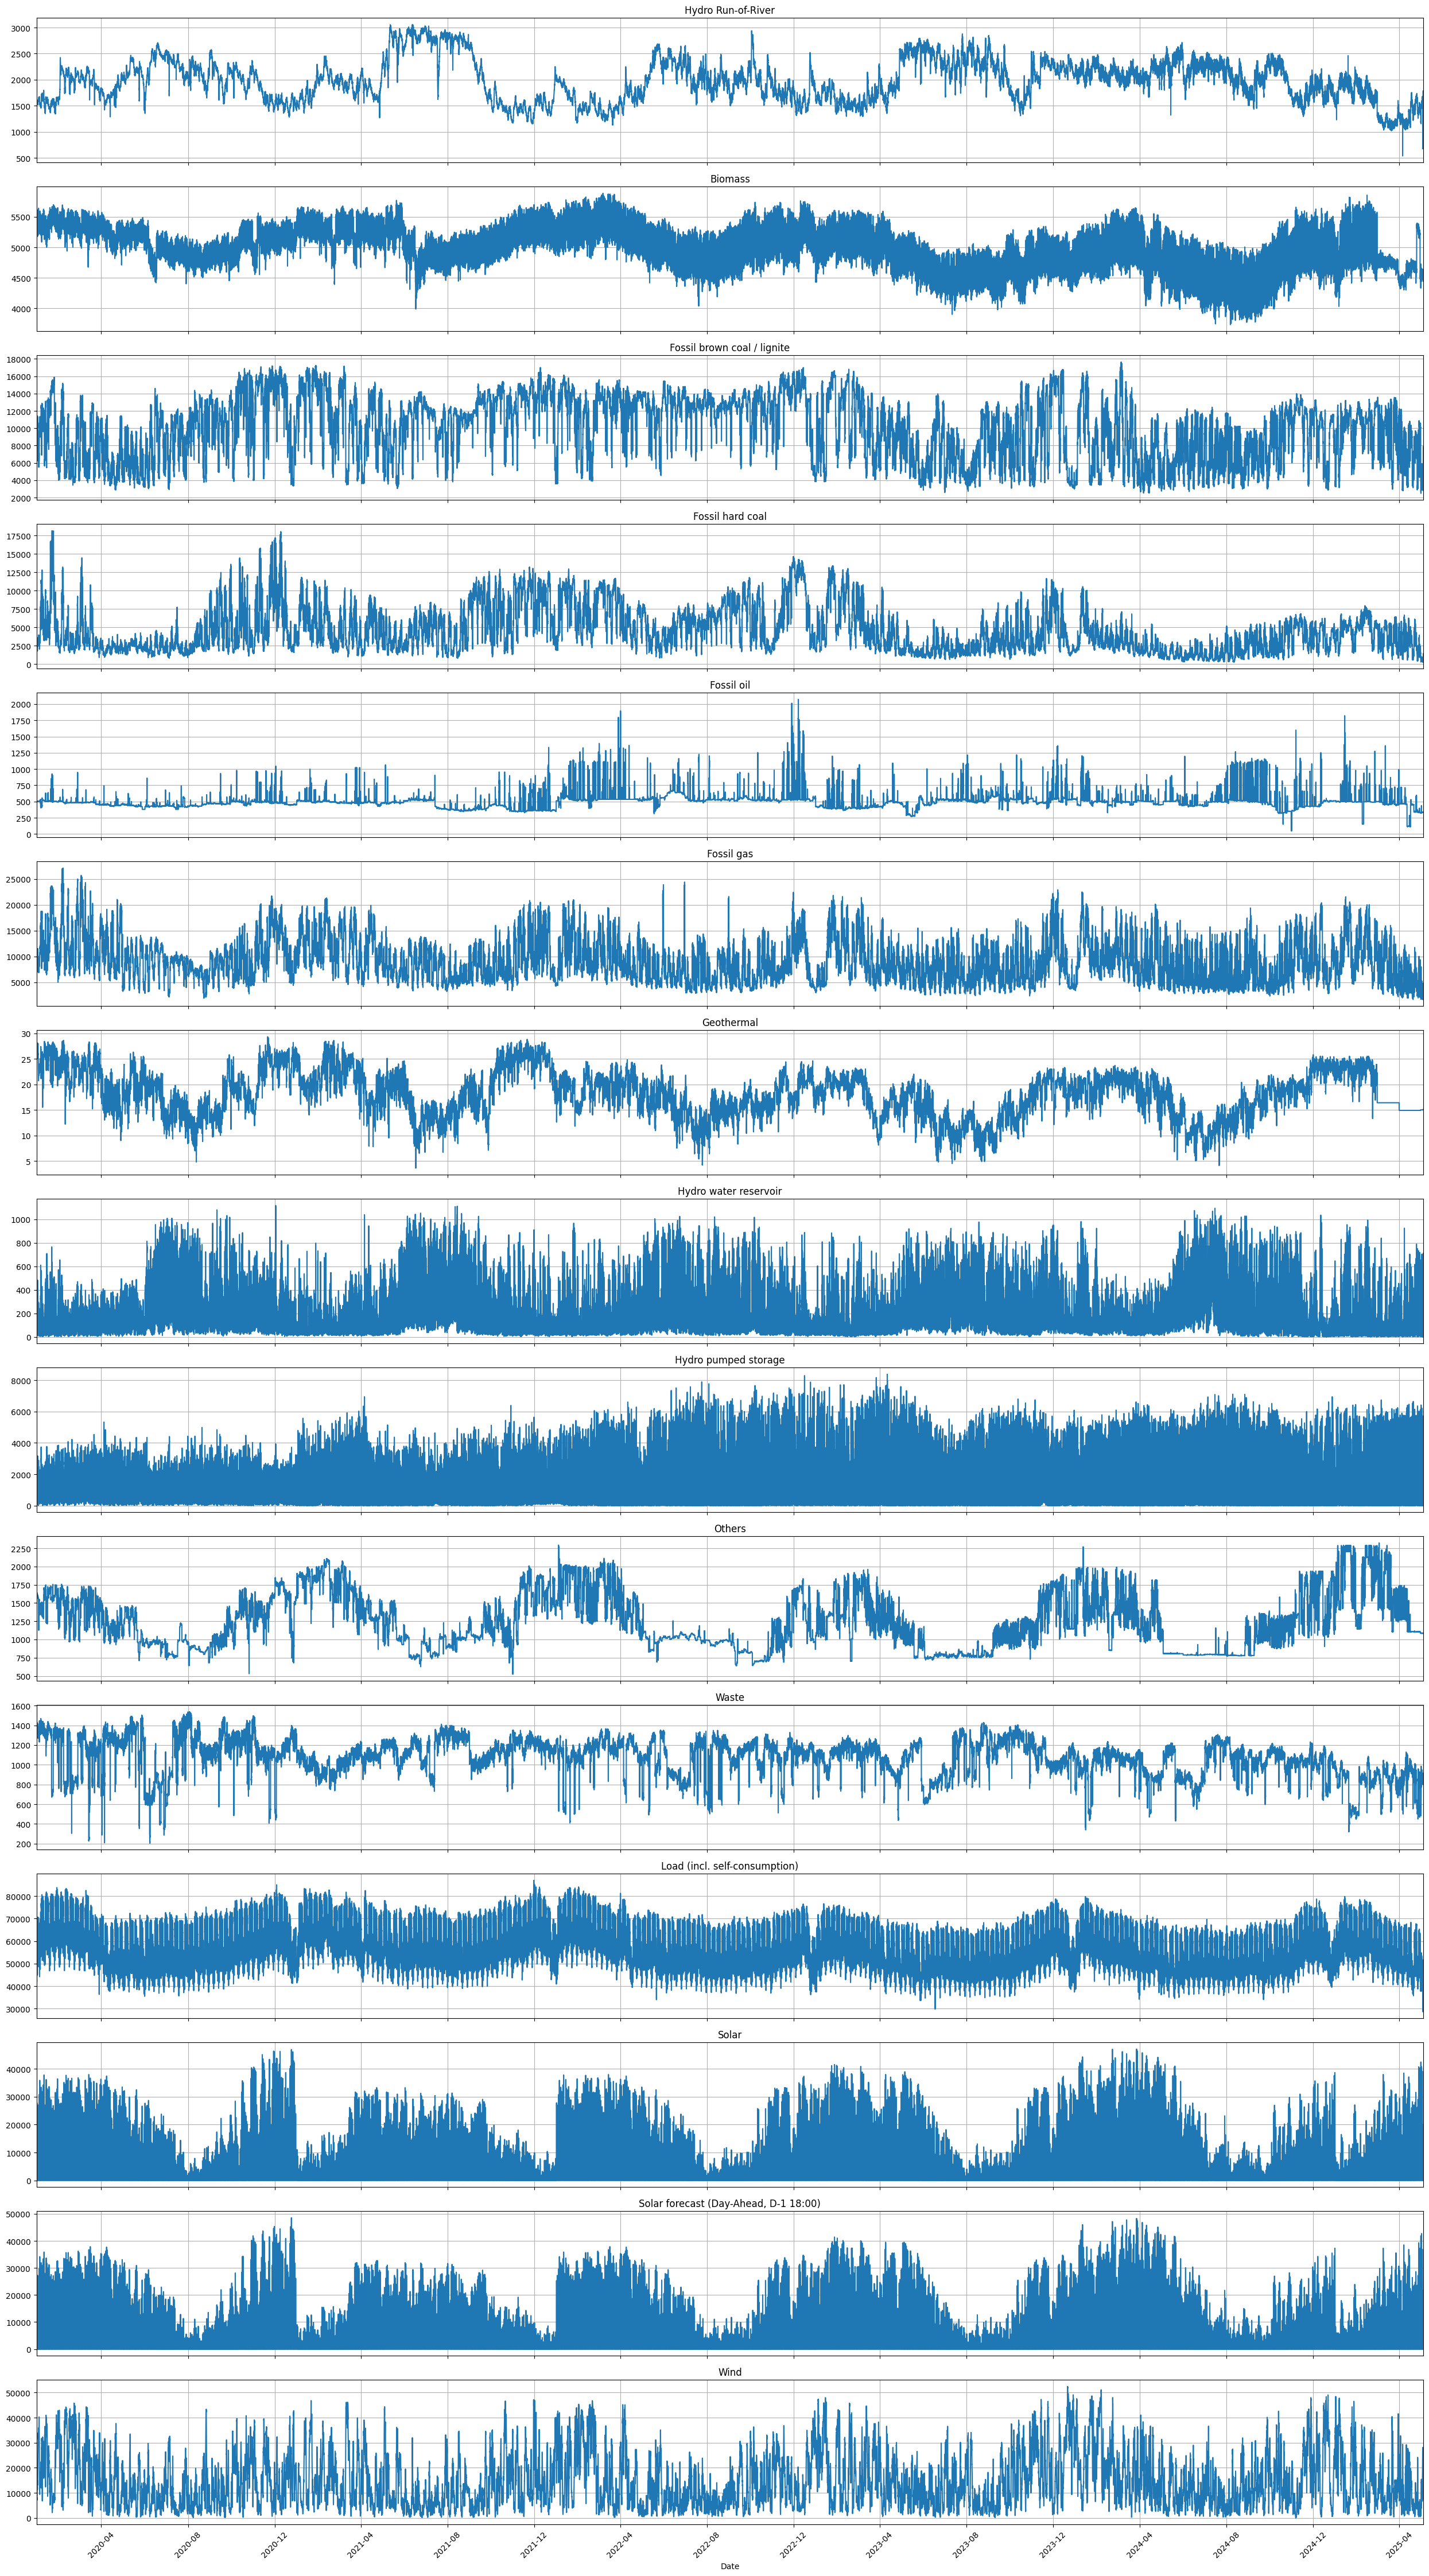

In [ ]:
features = dfd.columns
n_cols = len(features)

# Many graphs in one cell
fig, axs = plt.subplots(n_cols, 1, figsize=(25, 3 * n_cols), sharex=True)

# If only 1 graph (for future)
if n_cols == 1:
    axs = [axs]

# Build each graph
for i, col in enumerate(features):
    axs[i].plot(dfd.index, dfd[col], label=col, color='tab:blue')
    axs[i].set_title(col)
    axs[i].grid(True)
    # Notes for labels every 6 months
    axs[i].xaxis.set_major_locator(mdates.MonthLocator(interval=4))
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    #limits for the graphs
    axs[i].set_xlim([dfd.index.min(), dfd.index.max()])

plt.xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

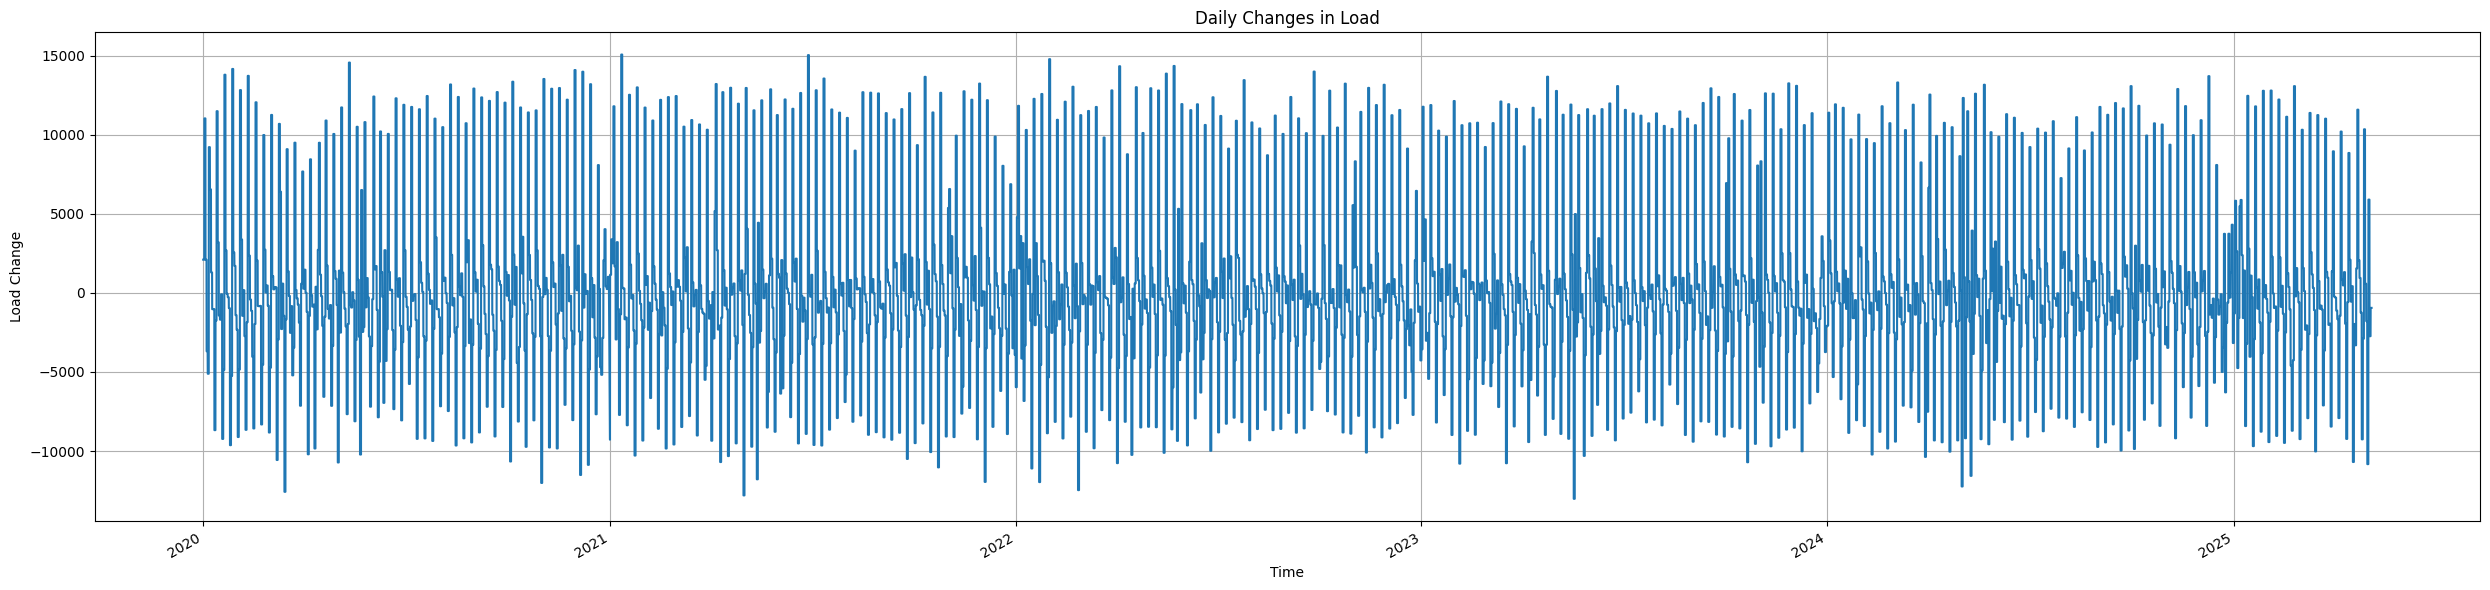

In [ ]:
# 1. Average load by day
daily_mean = dfd['Load (incl. self-consumption)'].resample('D').mean()

# 2. Difference by days
daily_diff = daily_mean.diff()

# 3. We convert the index to the date (without time)
dfd['Daily_Load_Change'] = dfd.index.floor('D').map(daily_diff)

# Plot the daily changes
plt.figure(figsize=(25, 6))
dfd['Daily_Load_Change'].plot()
plt.title('Daily Changes in Load')
plt.xlabel('Time')
plt.ylabel('Load Change')
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-11-68507af704ea>:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_avg = group['Load (incl. self-consumption)'].resample('H').mean()


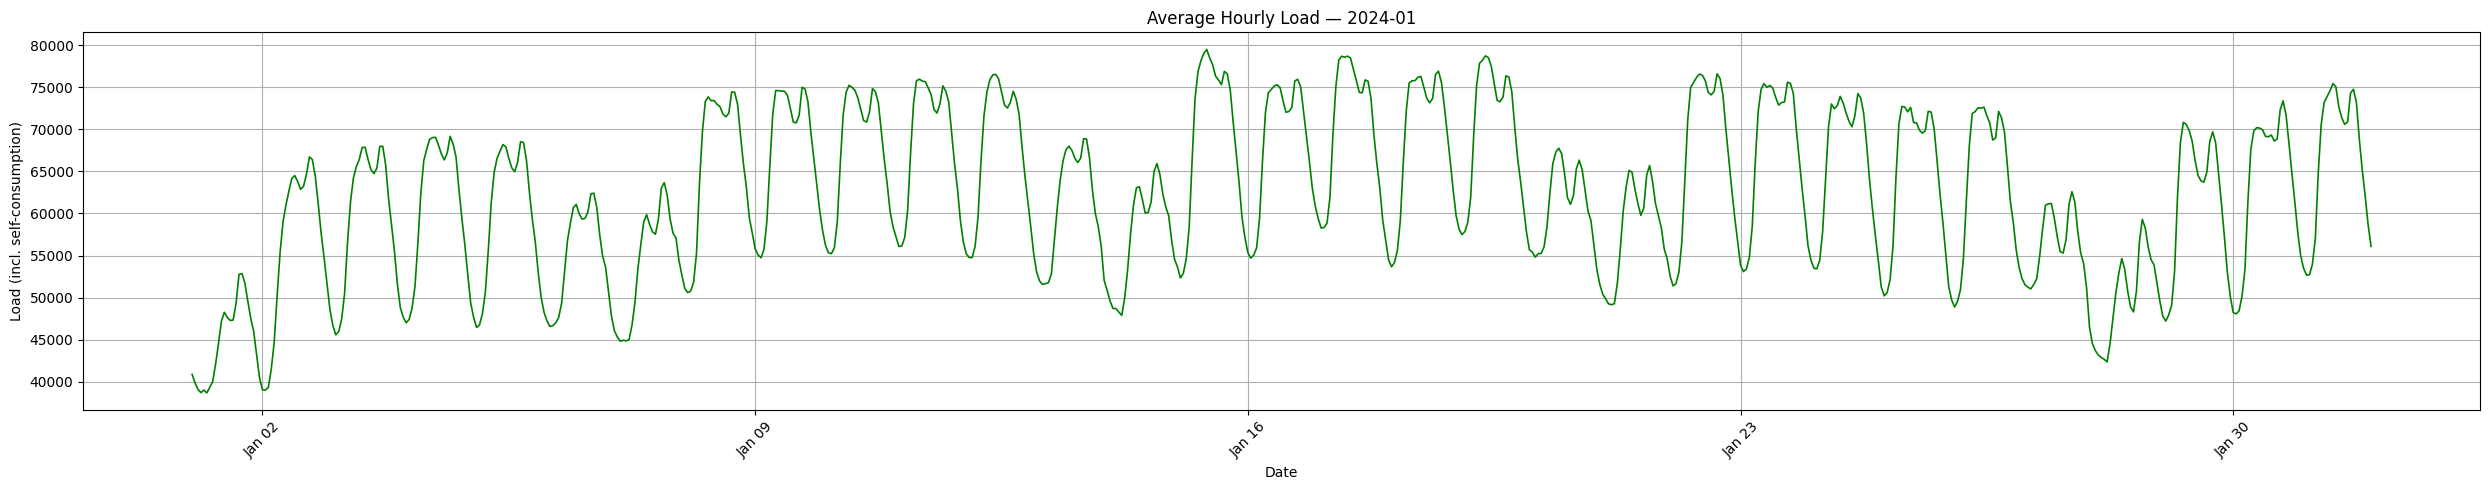

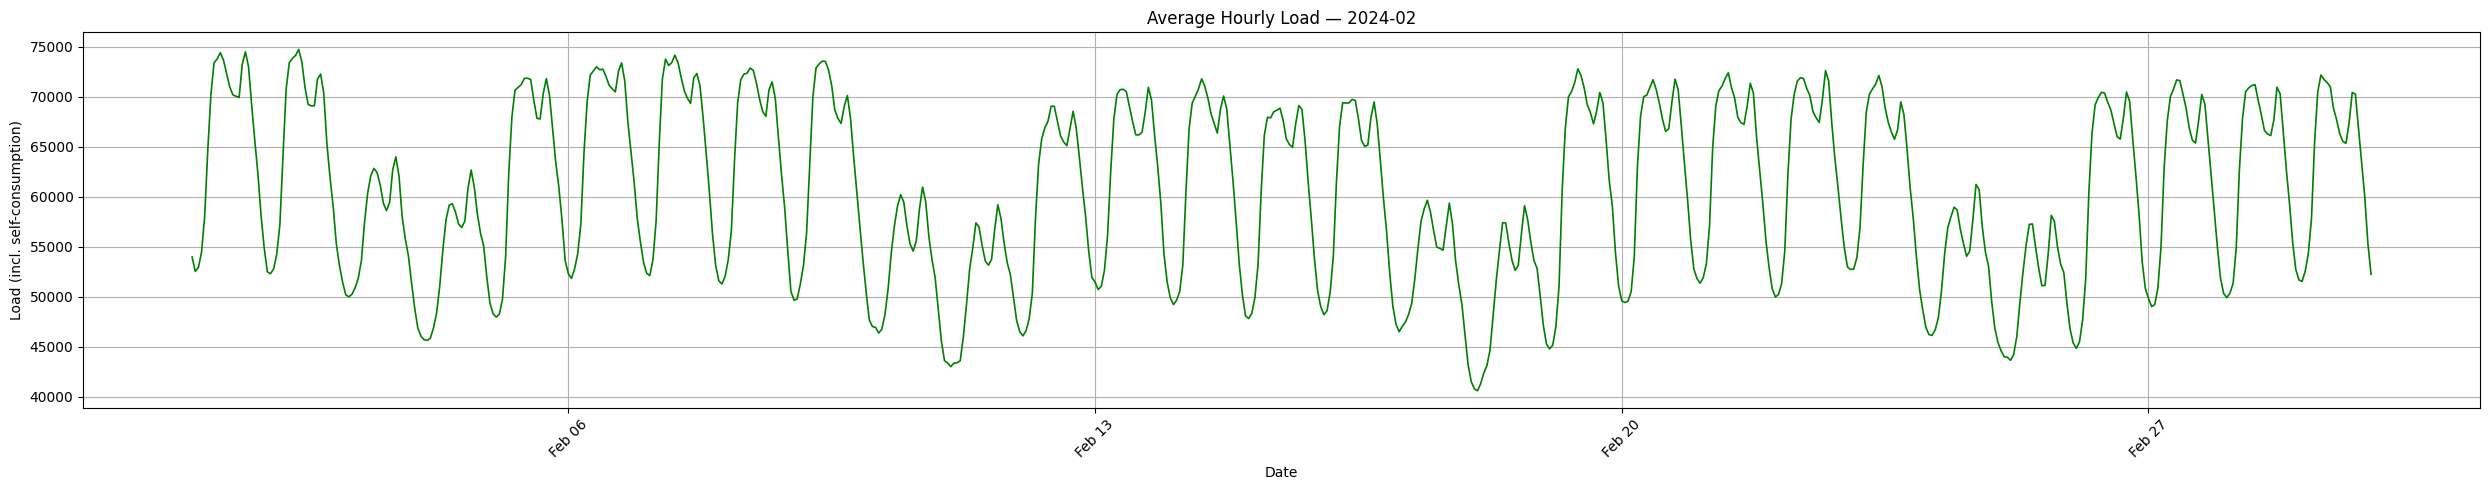

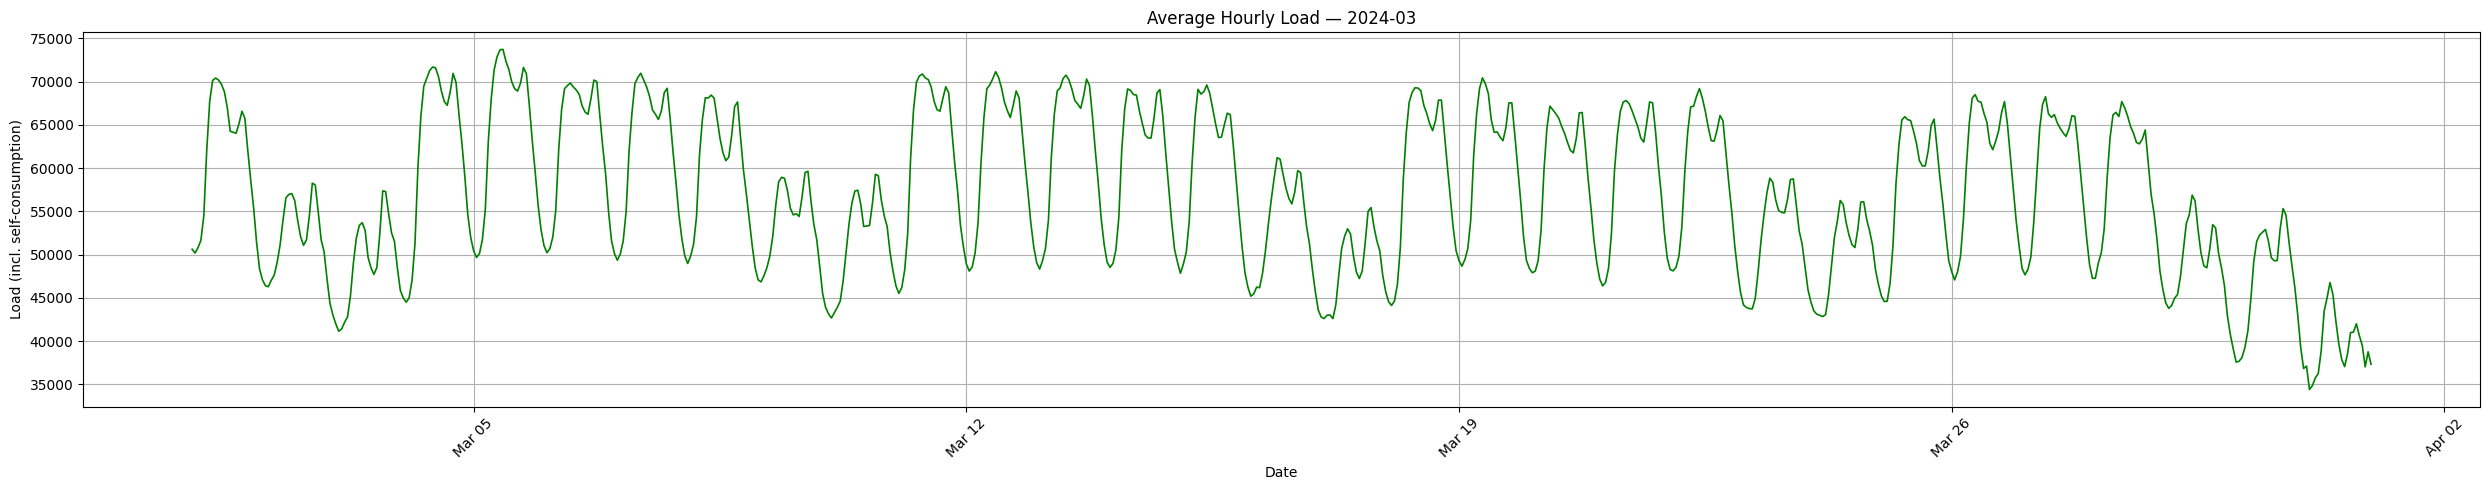

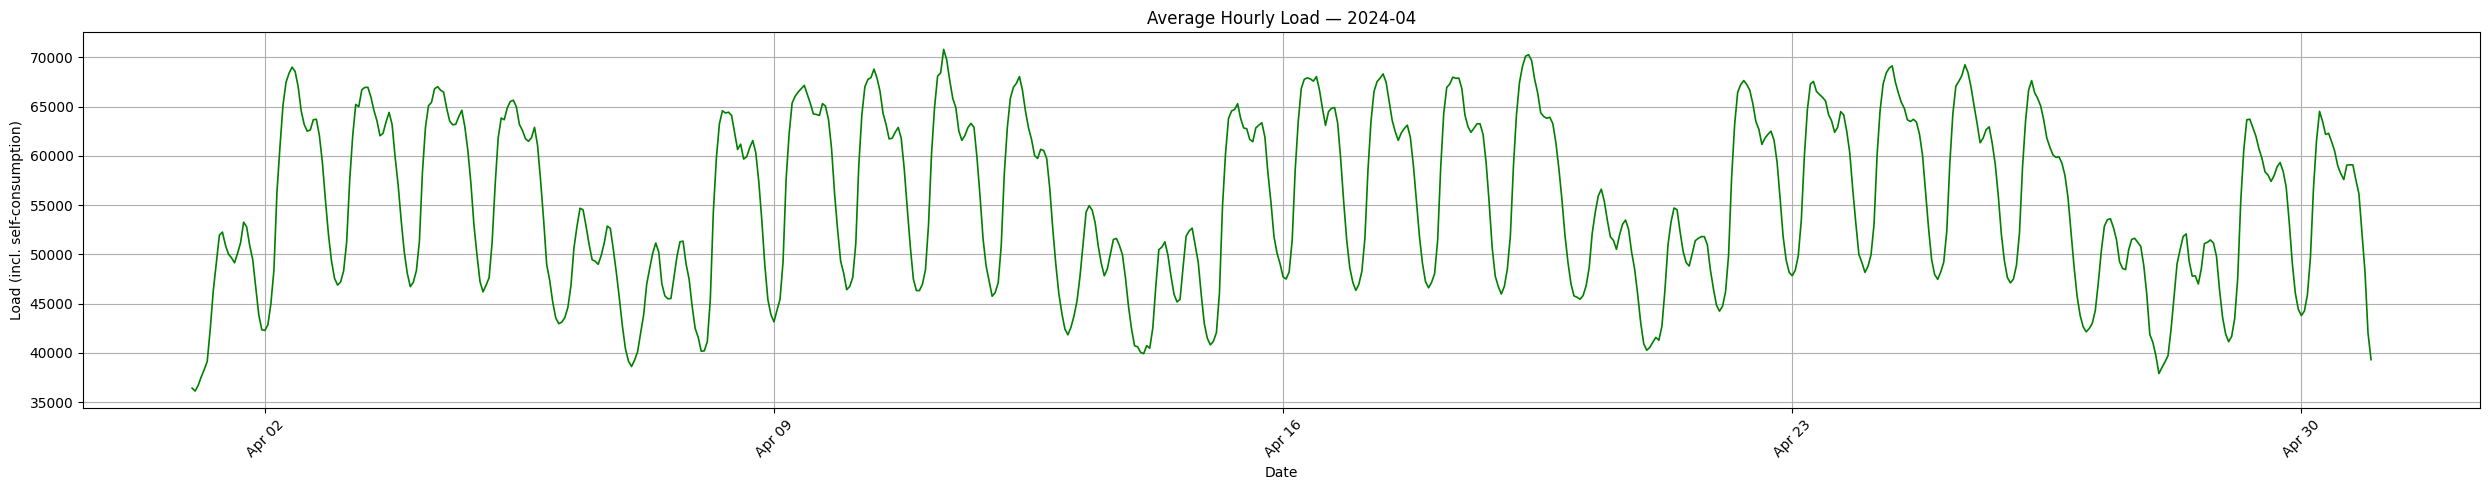

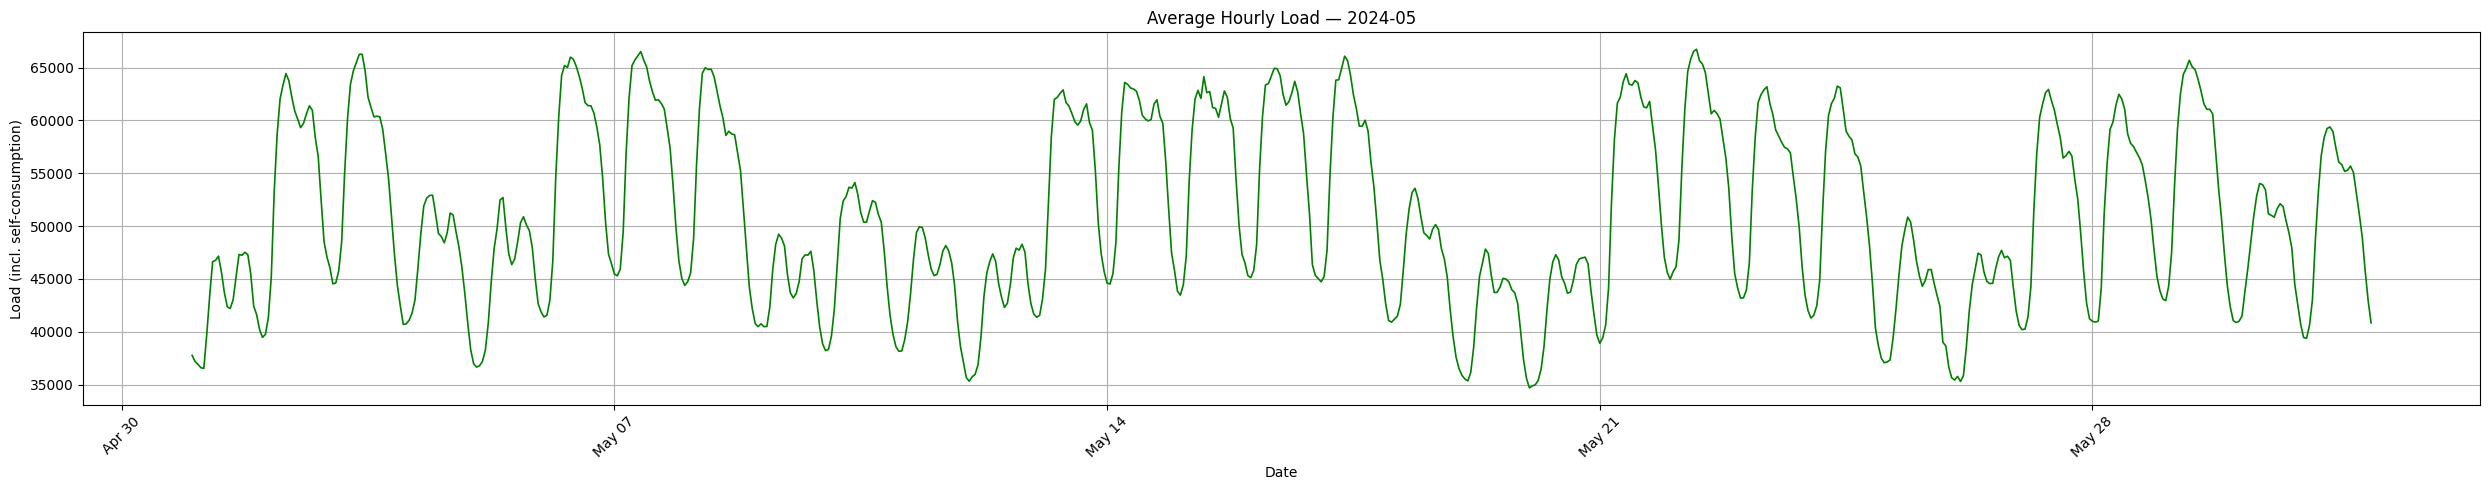

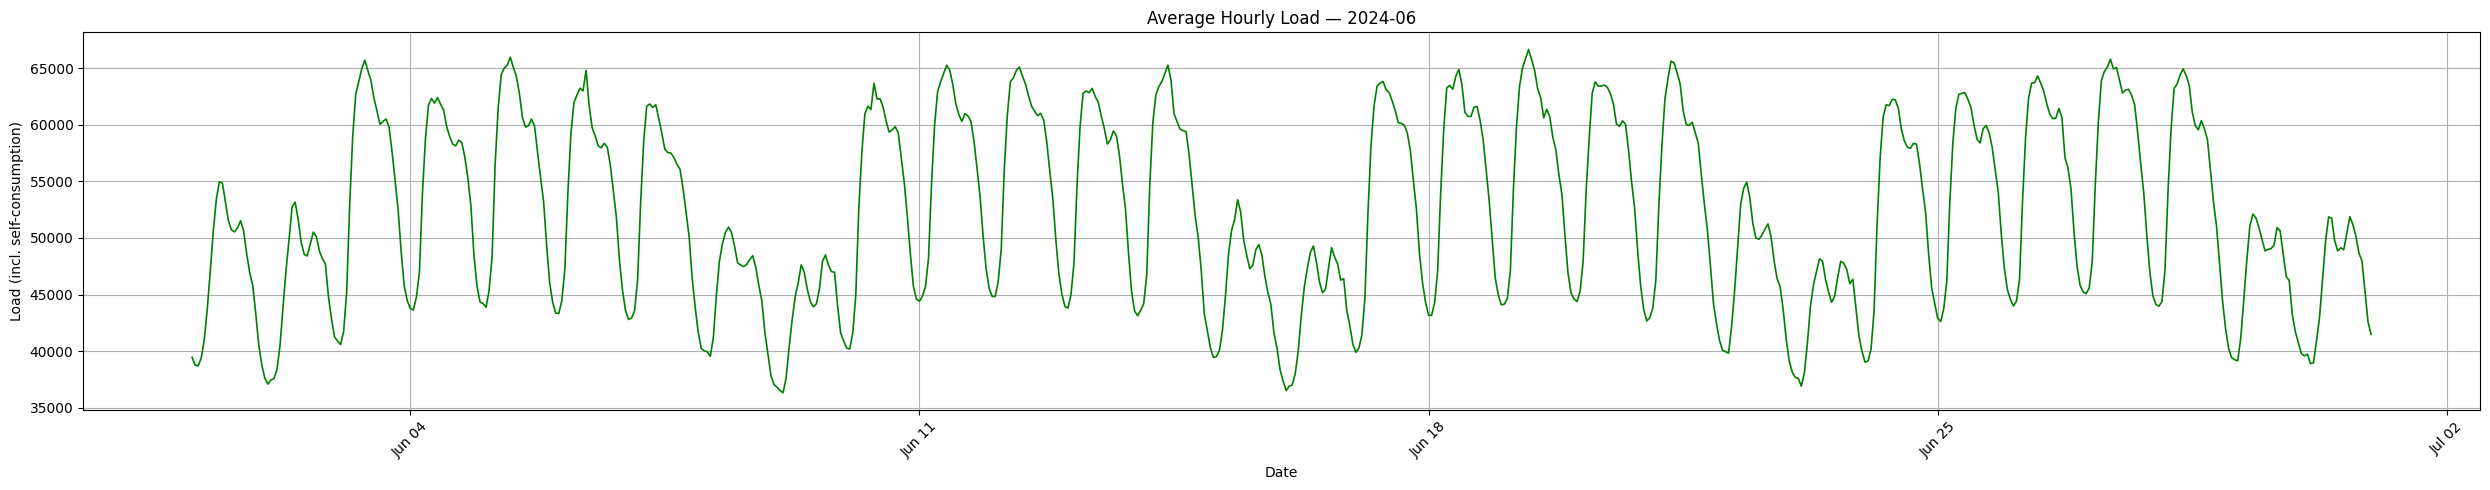

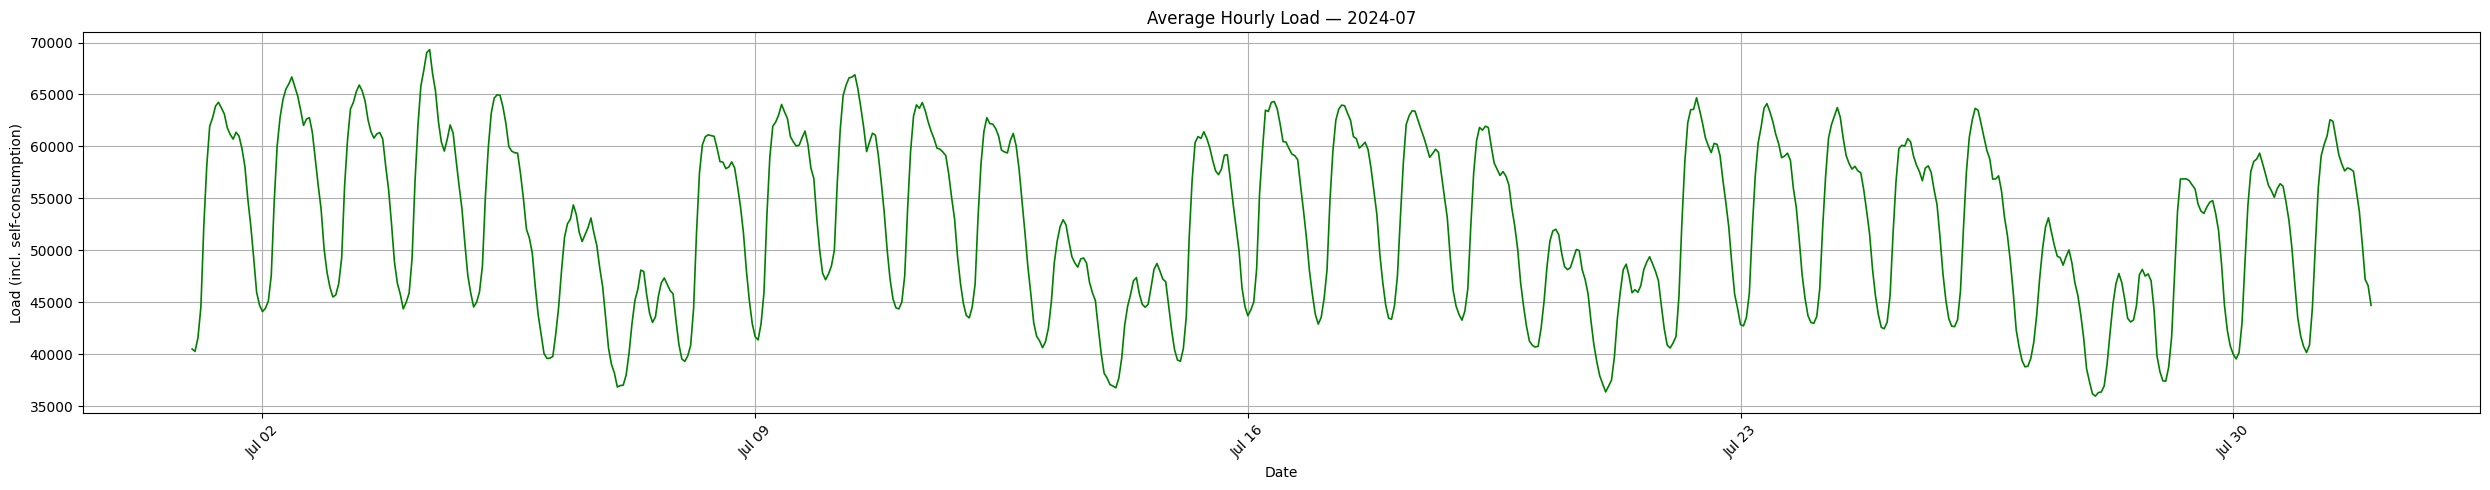

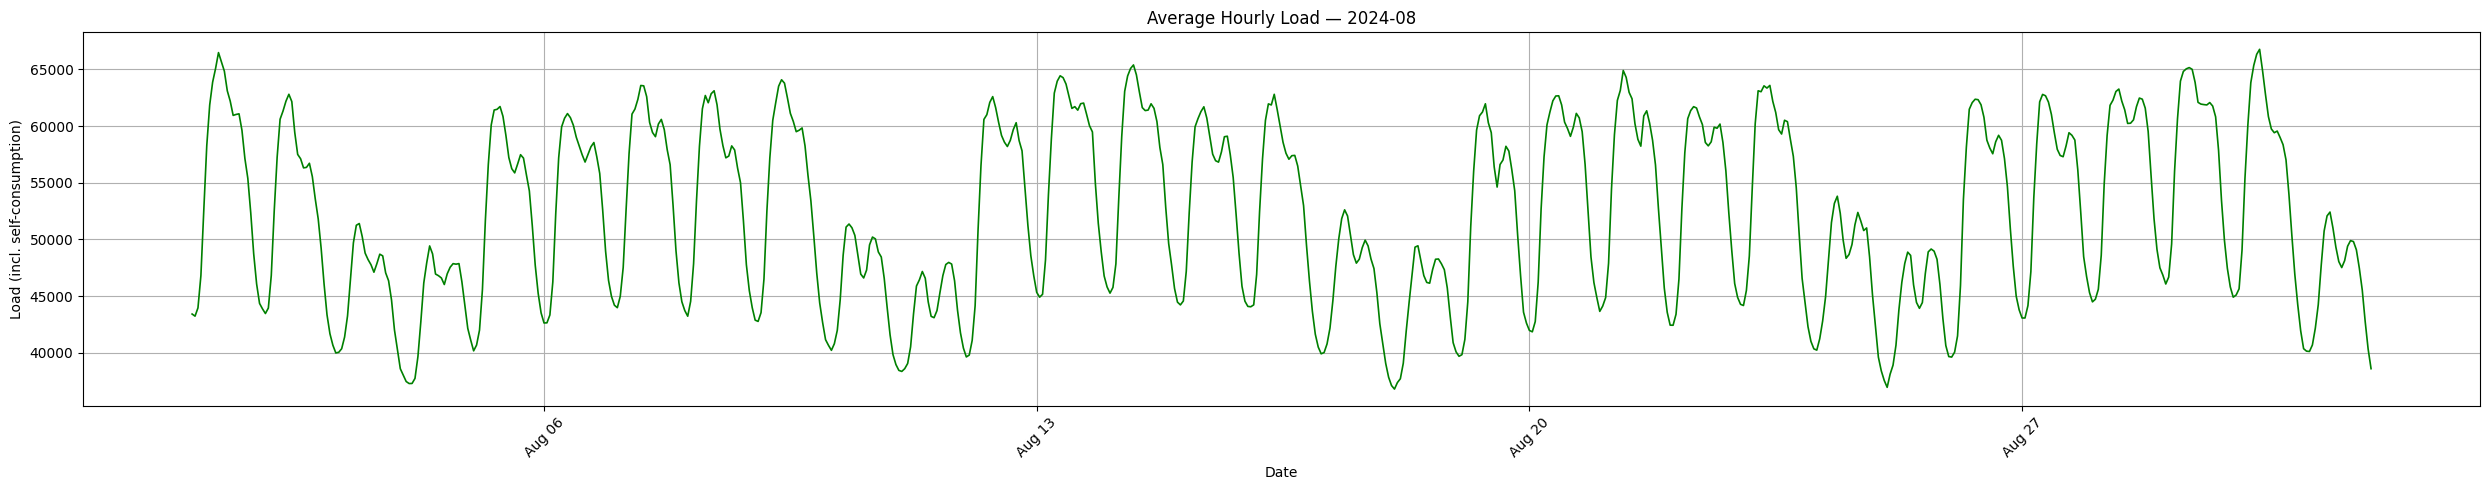

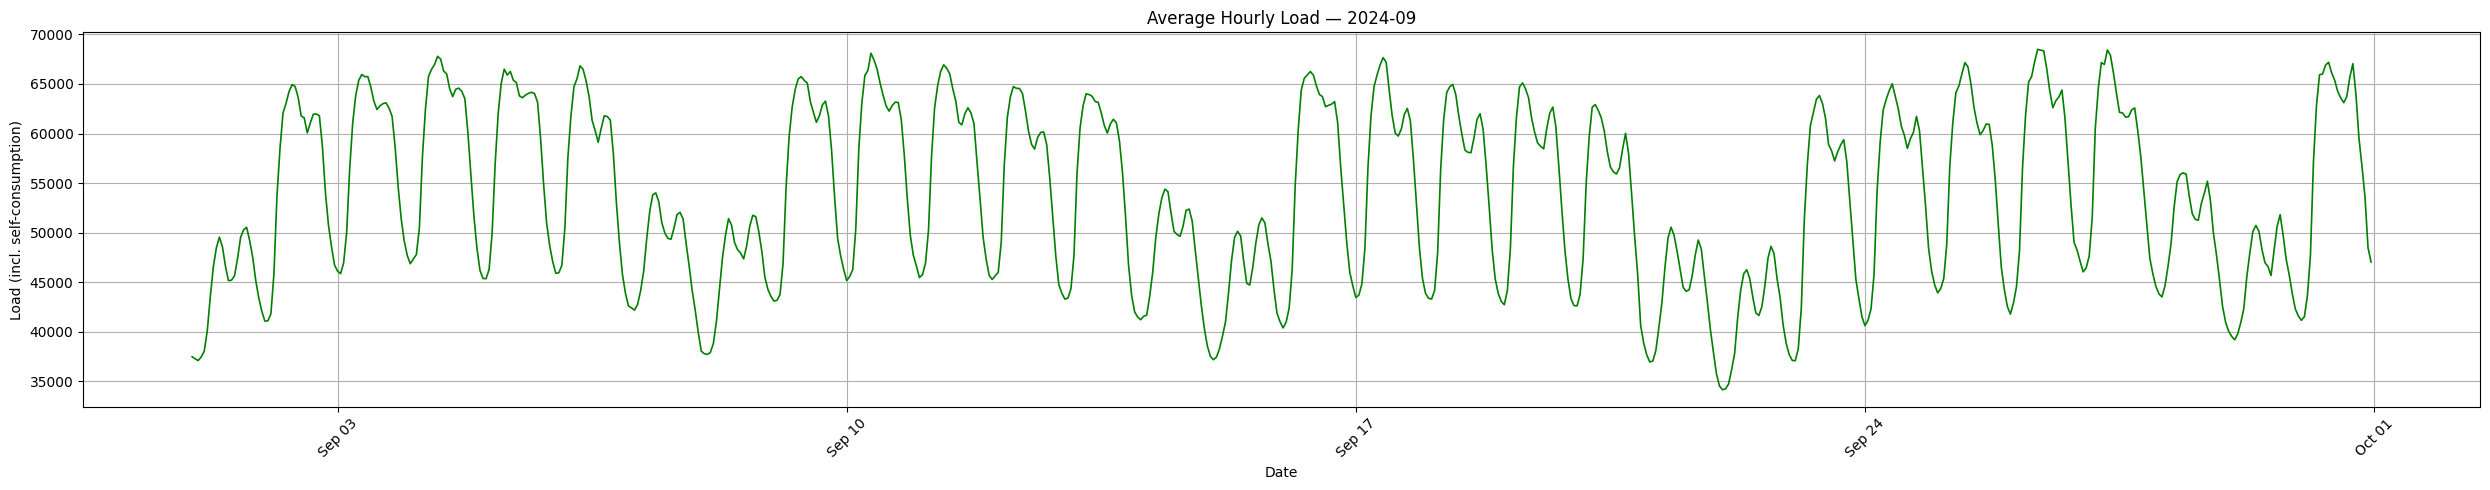

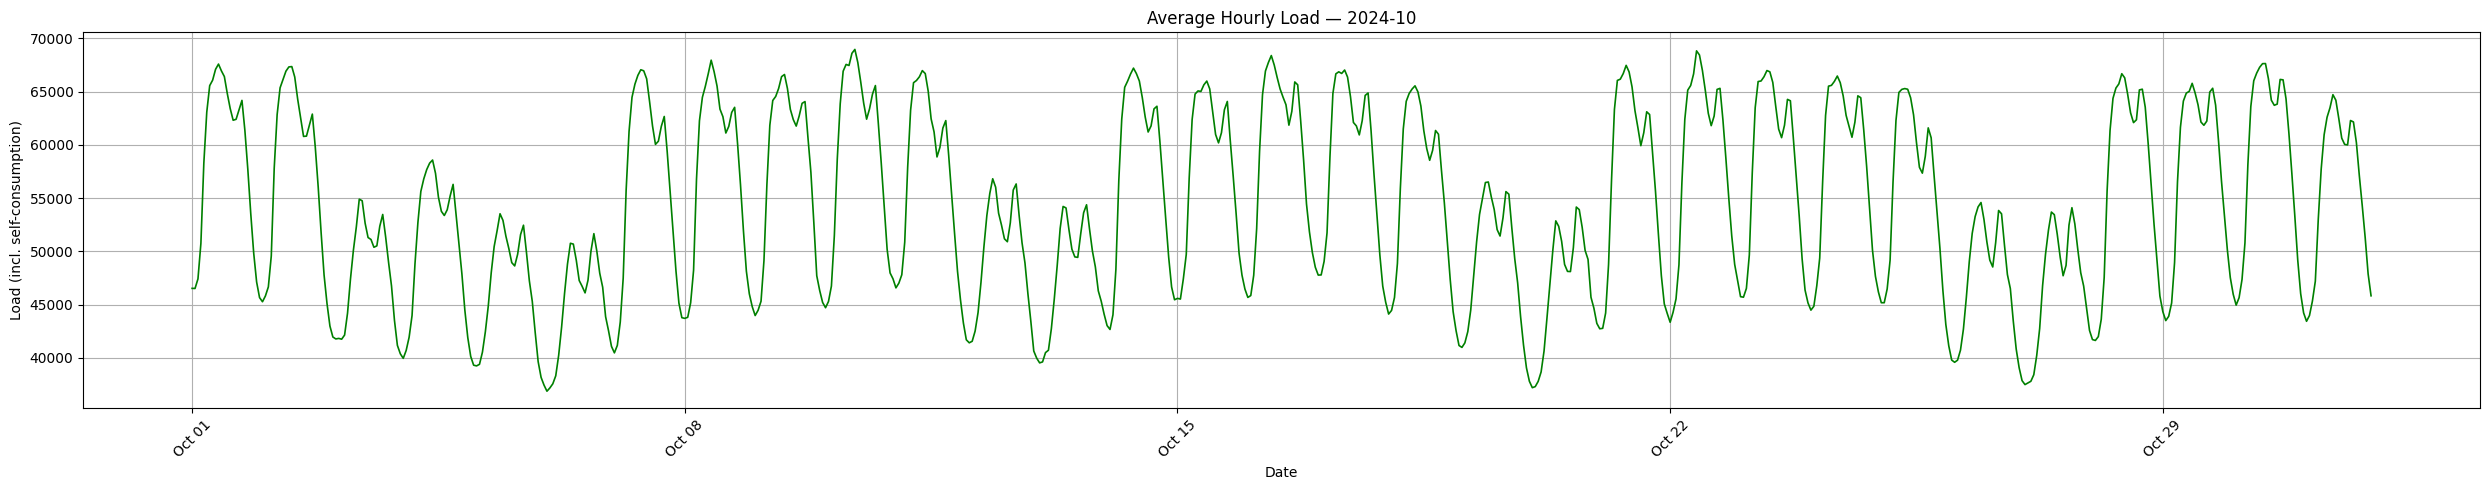

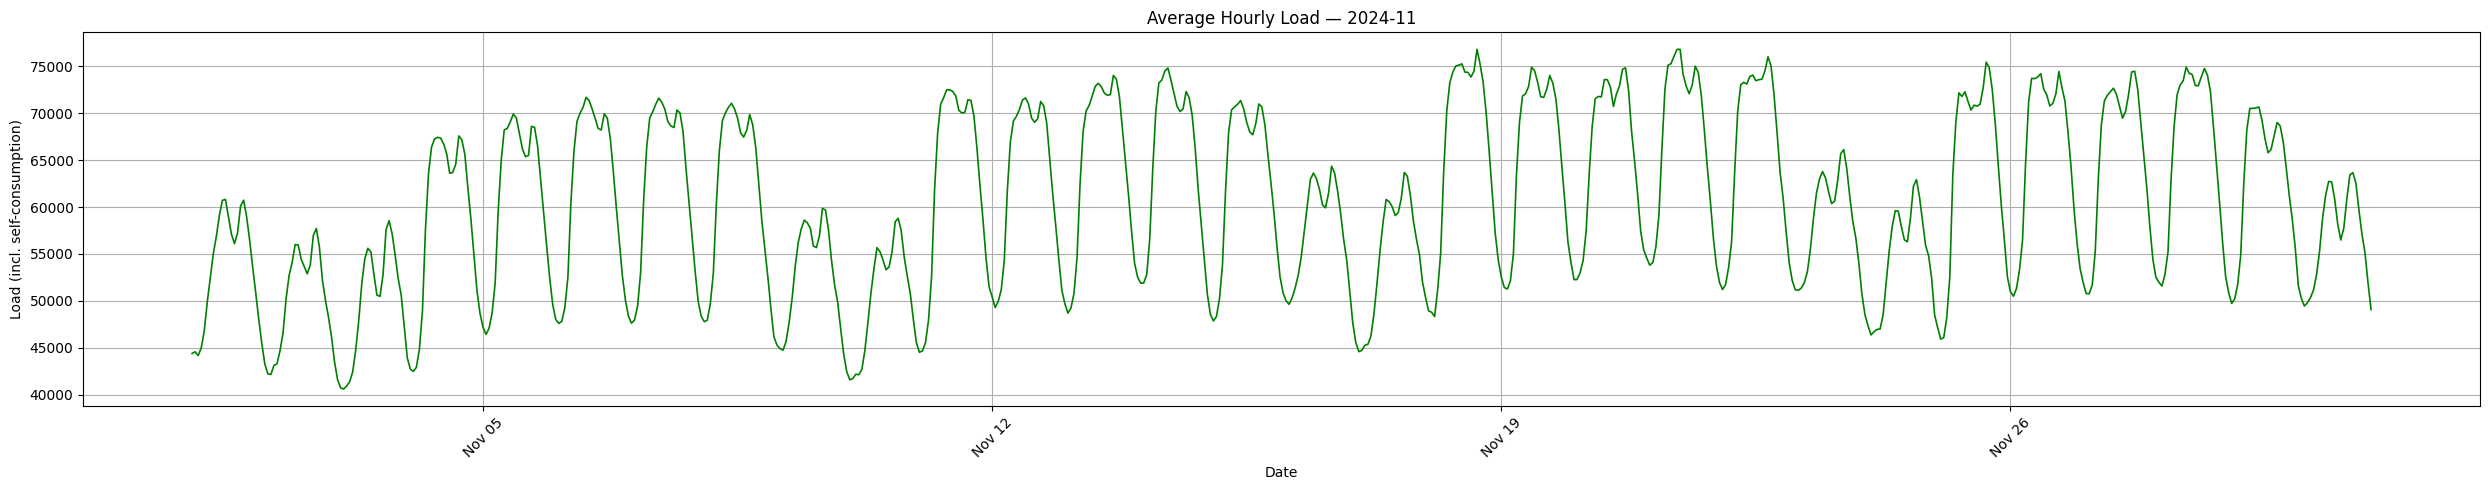

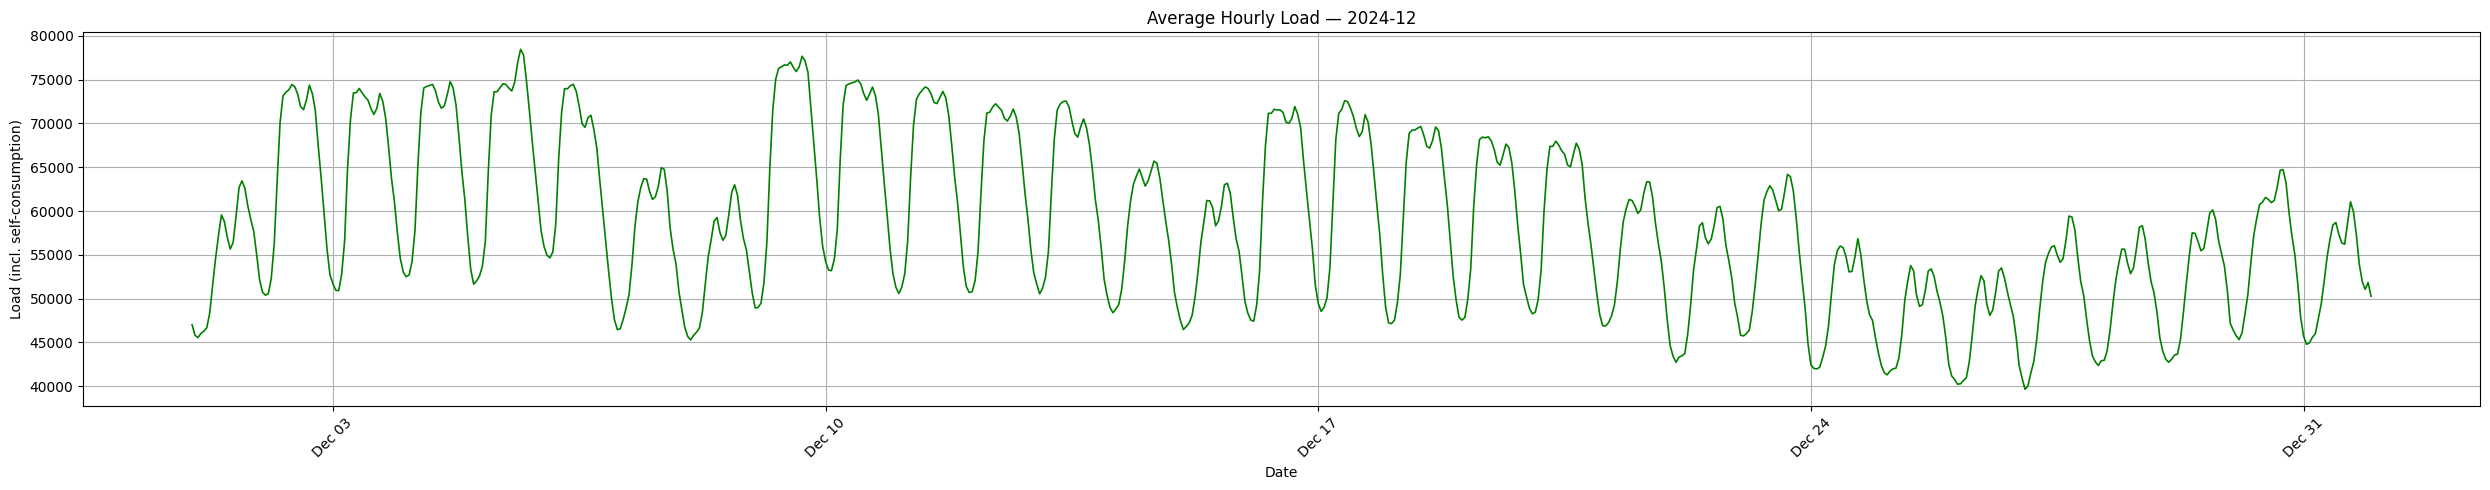

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 1. Only 2024
df_2024 = dfd[dfd.index.year == 2024]

# 2. monthly groups
monthly_groups = df_2024.groupby(df_2024.index.month)

# 3. Each month
for month, group in monthly_groups:
    #
    hourly_avg = group['Load (incl. self-consumption)'].resample('H').mean()

    #
    plt.figure(figsize=(25, 5))
    plt.plot(hourly_avg.index, hourly_avg, color='green', linewidth=1.2)

    #
    plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    plt.xticks(rotation=45)

    #
    plt.title(f"Average Hourly Load — 2024-{month:02d}")
    plt.xlabel("Date")
    plt.ylabel("Load (incl. self-consumption)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

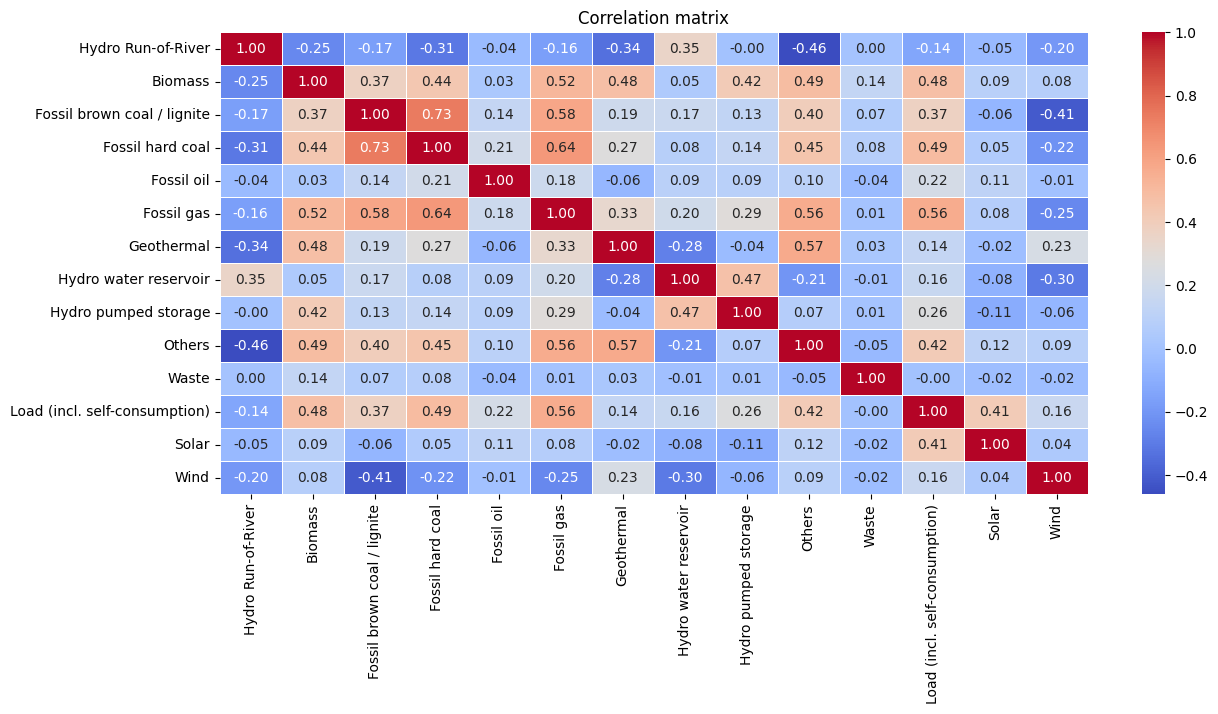

In [ ]:
# We have too many variables, check which are correlated

corr = dfd.drop(columns=['Daily_Load_Change','Solar forecast (Day-Ahead, D-1 18:00)']).corr()

plt.figure(figsize=(14, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation matrix')
plt.show()

# ExtremeValueTheory (change for the differences)

In [ ]:
!pip install pyextremes
import pandas as pd
import matplotlib.pyplot as plt

from pyextremes import __version__, get_extremes
from pyextremes.plotting import plot_extremes
from pyextremes import EVA

In [ ]:
df_Load = dfd['Load (incl. self-consumption)']
df_Load.name = "Load"

df_Load_2023 = df_Load.loc["2022-06-01":]
isinstance(df_Load, pd.Series)

True

## Create model

In [ ]:
df_Diff = dfd['Daily_Load_Change']

df_Diff = df_Diff["2022-06-01":]
isinstance(df_Load, pd.Series)

True

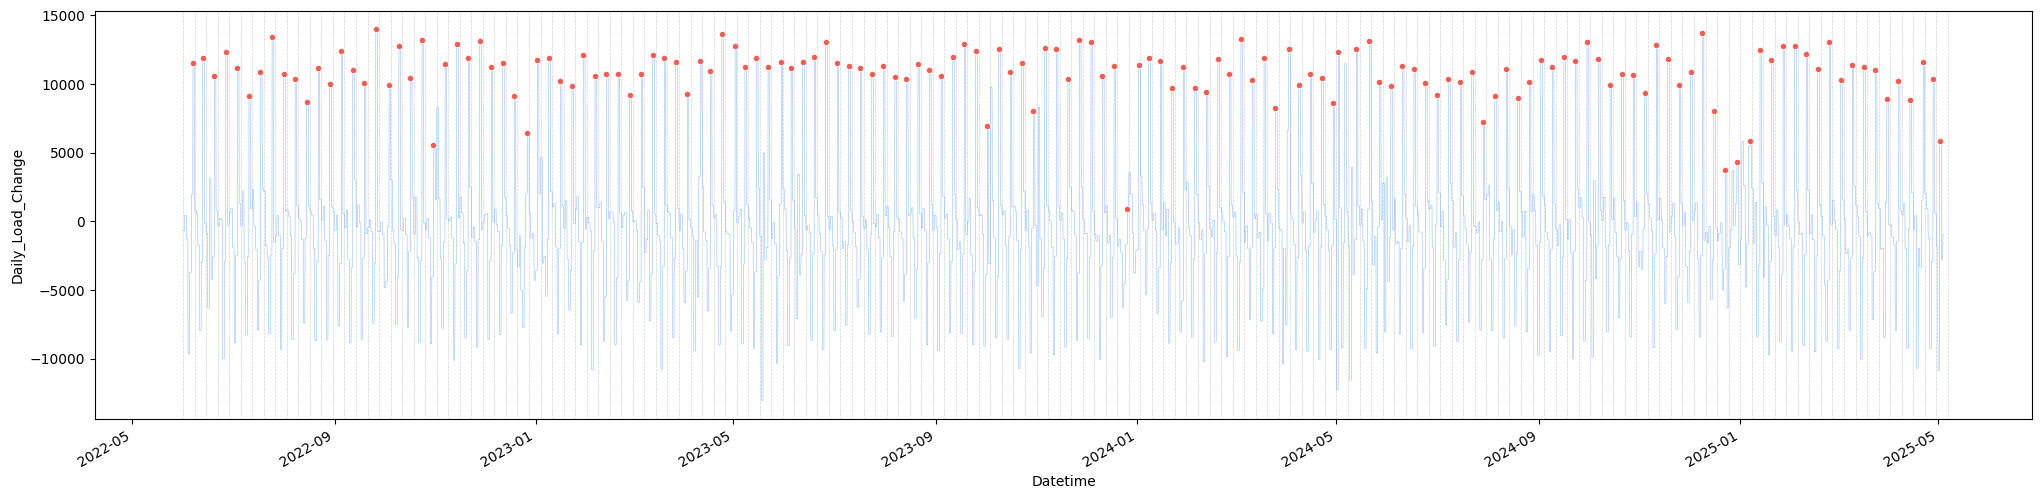

In [ ]:
from pyextremes import EVA

model = EVA(df_Diff)
model.get_extremes(method="BM", block_size="7D")

fig, ax = plt.subplots(figsize=(25, 6))
model.plot_extremes(ax=ax)
plt.show()

In [ ]:
model.fit_model()

## Calculate return values

In [ ]:
summary = model.get_summary(
    return_period=[0.5, 1, 2, 3, 5, 10],
    alpha=0.95,
    n_samples=1000,
)
print(summary)

               return value      lower ci      upper ci
return period                                          
0.5            13467.298608  13131.770450  13987.996875
1.0            13655.849975  13261.638859  13987.996875
2.0            13781.724276  13341.105702  13987.996875
3.0            13835.171607  13373.149058  13987.996875
5.0            13887.061419  13403.049750  13987.996875
10.0           13937.181212  13429.008483  14029.076687


(<Figure size 768x768 with 4 Axes>,
 (<Axes: title={'center': 'Return value plot'}, xlabel='Return period', ylabel='Daily_Load_Change'>,
  <Axes: title={'center': 'Probability density plot'}, xlabel='Daily_Load_Change', ylabel='Probability density'>,
  <Axes: title={'center': 'Q-Q plot'}, xlabel='Theoretical', ylabel='Observed'>,
  <Axes: title={'center': 'P-P plot'}, xlabel='Theoretical', ylabel='Observed'>))

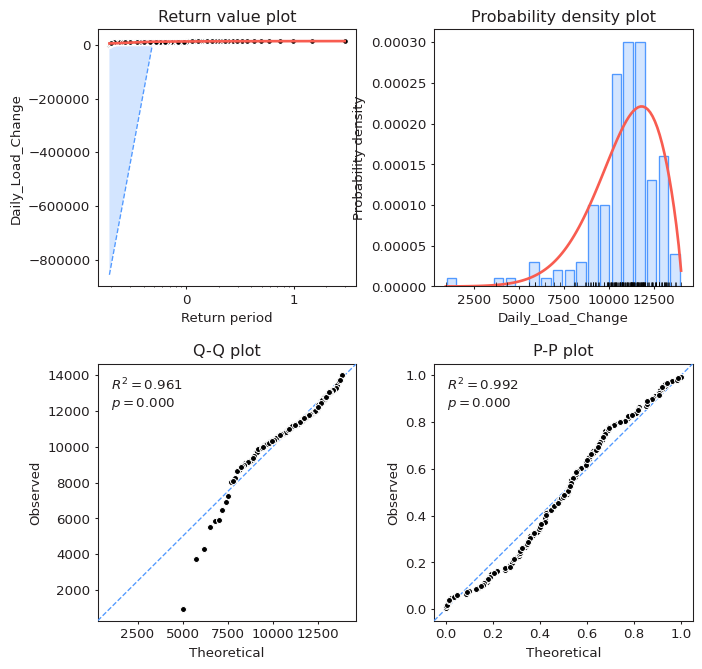

In [ ]:
model.plot_diagnostic(alpha=0.95)

## Block Maxima

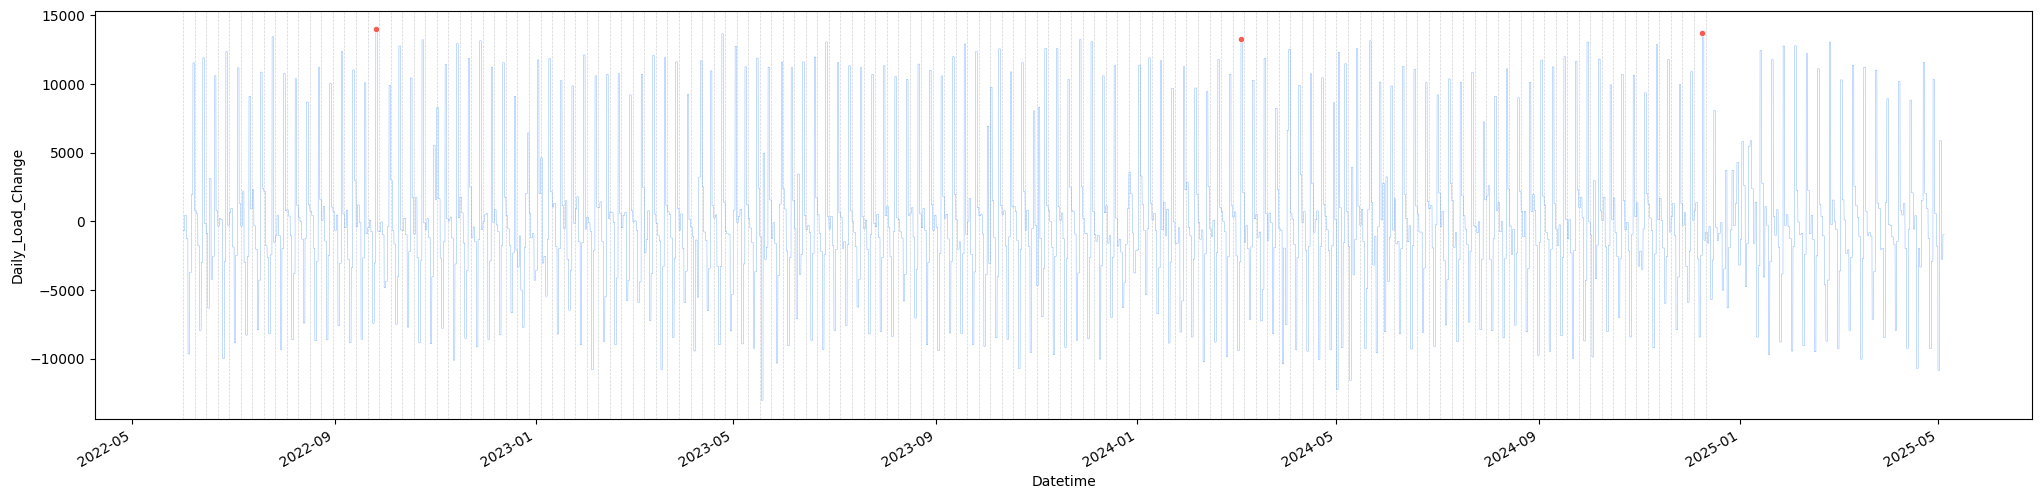

In [ ]:
from pyextremes import get_extremes
from pyextremes.plotting import plot_extremes

extremes = get_extremes(df_Diff, "BM")


fig, ax = plt.subplots(figsize=(25, 6))


plot_extremes(
    ts=df_Diff,
    extremes=extremes,
    extremes_method="BM",
    extremes_type="high",
    block_size="7D",
    ax=ax,
)
plt.show()

## Extracting Extremes

In [ ]:
get_extremes(
    ts=df_Diff,
    method="BM",
    extremes_type="high",
    block_size="7D",
    errors="raise",
    min_last_block=None,
)

Datetime
2022-06-07    11549.840625
2022-06-13    11920.652083
2022-06-20    10612.783333
2022-06-27    12363.610417
2022-07-04    11182.884375
                  ...     
2025-04-07    10195.284375
2025-04-14     8842.168750
2025-04-22    11579.104167
2025-04-28    10339.367708
2025-05-02     5894.892708
Name: Daily_Load_Change, Length: 153, dtype: float64

## Selecting Block Size

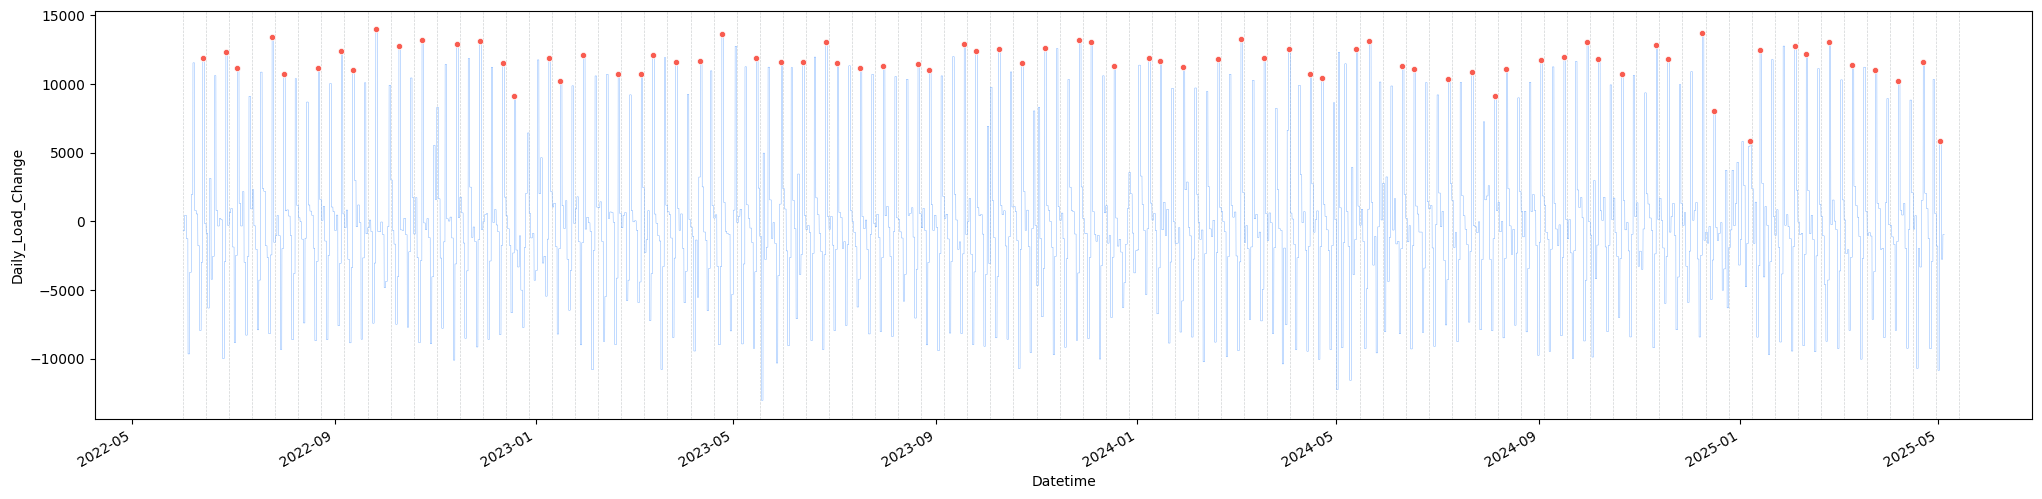

In [ ]:
extremes = get_extremes(
    ts=df_Diff,
    method="BM",
    block_size=pd.to_timedelta("7D") * 2,
)
fig, ax = plt.subplots(figsize=(25, 6))
plot_extremes(
    ts=df_Diff,
    extremes=extremes,
    extremes_method="BM",
    extremes_type="high",
    block_size=pd.to_timedelta("7D") * 2,
    ax=ax,
)
plt.show()


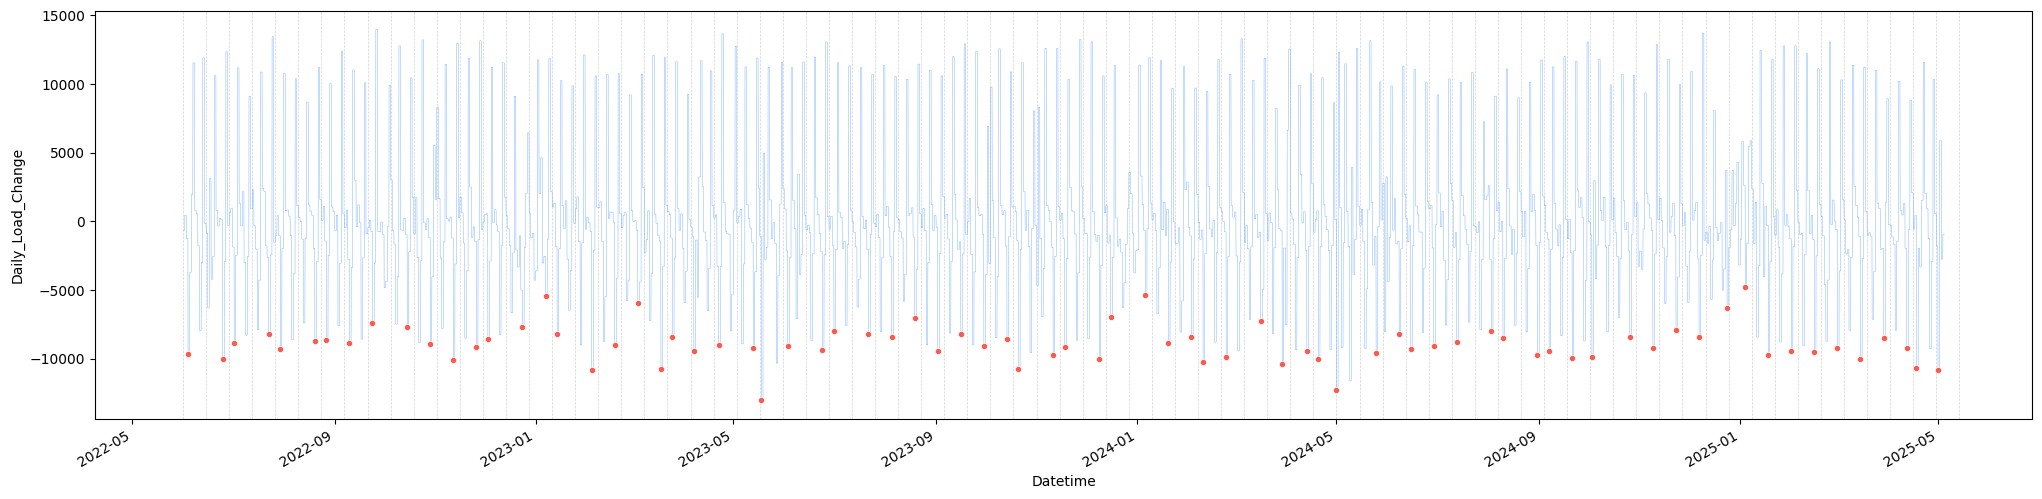

In [ ]:
extremes = get_extremes(
    ts=df_Diff,
    method="BM",
    extremes_type="low",
    block_size=pd.to_timedelta("7D") * 2,
)
fig, ax = plt.subplots(figsize=(25, 6))
plot_extremes(
    ts=df_Diff,
    extremes=extremes,
    extremes_method="BM",
    extremes_type="low",
    block_size=pd.to_timedelta("7D") * 2,
    ax=ax,
)
plt.show()

## Peaks Over Threshold

/usr/local/lib/python3.11/dist-packages/pyextremes/extremes/peaks_over_threshold.py:18: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  r = pd.to_timedelta(r)
/usr/local/lib/python3.11/dist-packages/pyextremes/eva.py:525: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  self.__extremes_kwargs["r"] = pd.to_timedelta(kwargs.get("r", "24h"))


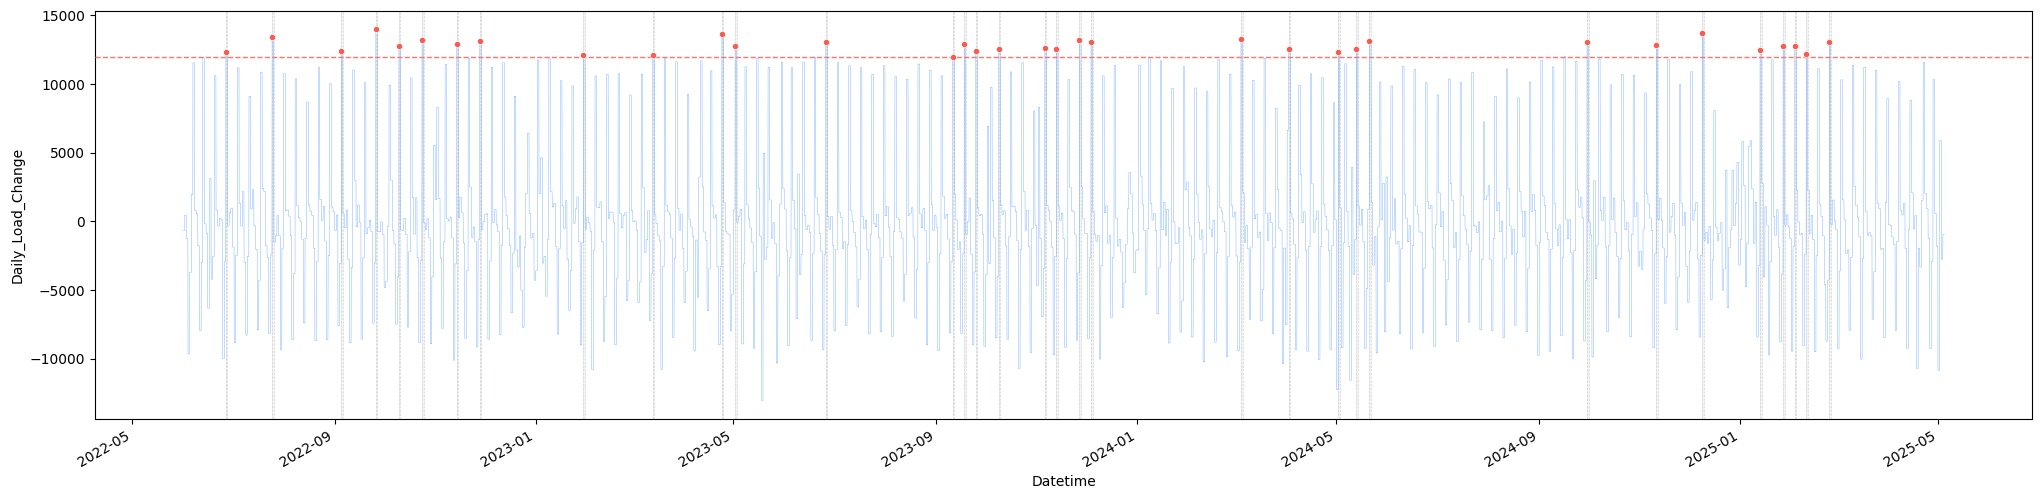

In [ ]:
from pyextremes import EVA

model = EVA(data=df_Diff)
model.get_extremes("POT", threshold=12000, r="6H")

fig, ax = plt.subplots(figsize=(25, 6))
model.plot_extremes(show_clusters=True, ax=ax)
plt.show()

/usr/local/lib/python3.11/dist-packages/scipy/stats/_distn_infrastructure.py:2304: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.11/dist-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


<Axes: xlabel='Threshold', ylabel='Mean excess'>

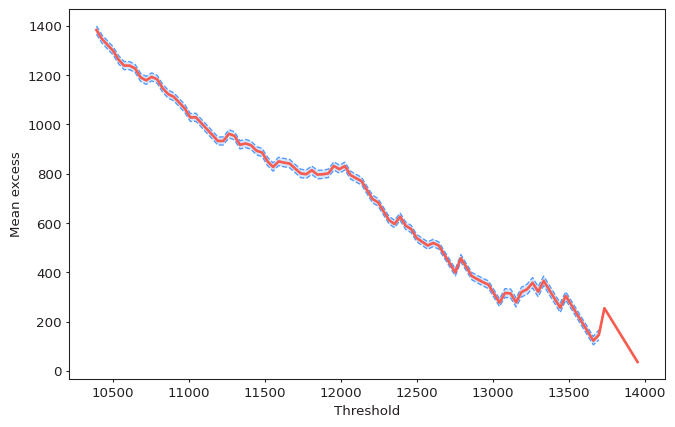

In [ ]:
from pyextremes import plot_mean_residual_life

plot_mean_residual_life(df_Diff)